# Correction  Carte de Voeux

In [21]:
from urllib import request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [22]:
request.urlretrieve ("https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv", "births.csv")
births = pd.read_csv("births.csv")

In [23]:
births.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [24]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [25]:
births['decade'] = 10 * (births['year'] // 10)

In [26]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


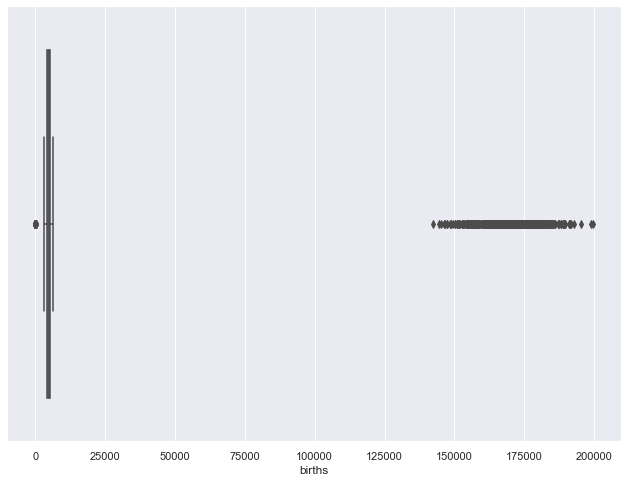

In [27]:
fig = plt.figure(figsize=(11,8))
fig = sns.boxplot(births.births)

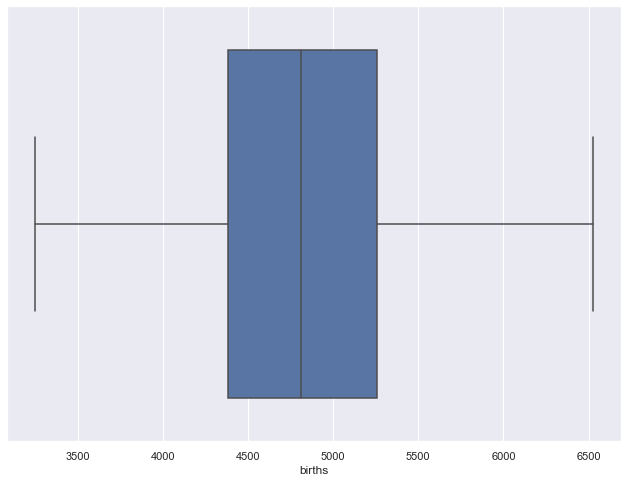

In [28]:
births = births.query('(births > 1000) & (births < 100000)')
fig = plt.figure(figsize=(11,8))
fig = sns.boxplot(births.births)


In [29]:
births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    14610 non-null  int64  
 1   month   14610 non-null  int64  
 2   day     14610 non-null  float64
 3   gender  14610 non-null  object 
 4   births  14610 non-null  int64  
 5   decade  14610 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 799.0+ KB


In [30]:
for field in ["day", "month", "year"]:
    births[field] = births[field].astype(int)

In [32]:
# create a datetime index from the year, month, day
births['dt'] = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14610 entries, 1969-01-01 to 1988-12-31
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    14610 non-null  int32         
 1   month   14610 non-null  int32         
 2   day     14610 non-null  int32         
 3   gender  14610 non-null  object        
 4   births  14610 non-null  int64         
 5   decade  14610 non-null  int64         
 6   dt      14610 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int32(3), int64(2), object(1)
memory usage: 741.9+ KB


In [36]:
births['my_dates'] = pd.to_datetime(births['dt'])

births['day_of_week'] = births['my_dates'].dt.day_name()

In [51]:
g=births.groupby(births.day_of_week )
#g.first()décision 
#g.sum()
#g.mean()
g.births.sum()

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [37]:
births.head()

,year,month,day,gender,births,decade,dt,my_dates,day_of_week
1969-01-01,1969,1,1,F,4046,1960,1969-01-01,1969-01-01,Wednesday
1969-01-01,1969,1,1,M,4440,1960,1969-01-01,1969-01-01,Wednesday
1969-01-02,1969,1,2,F,4454,1960,1969-01-02,1969-01-02,Thursday
1969-01-02,1969,1,2,M,4548,1960,1969-01-02,1969-01-02,Thursday
1969-01-03,1969,1,3,F,4548,1960,1969-01-03,1969-01-03,Friday


<Figure size 792x576 with 0 Axes>

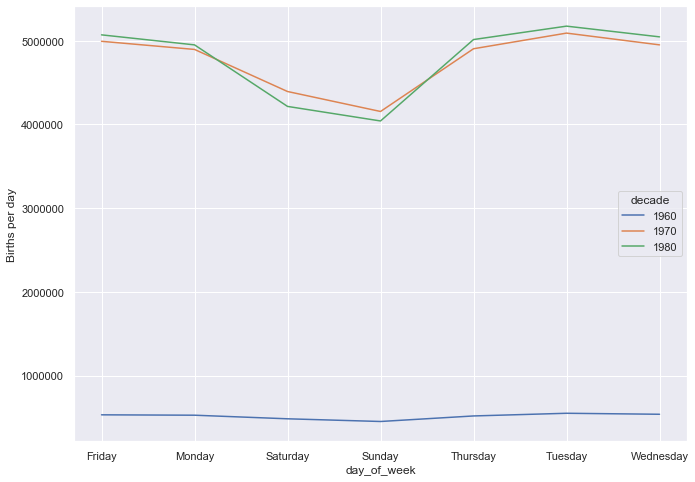

In [43]:
fig = plt.figure(figsize=(11,8))
births_per_day = births.pivot_table('births', index='day_of_week',
columns='decade', aggfunc='sum', )
births_per_day.plot(figsize=(11,8))
#plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Births per day');

<Figure size 792x576 with 0 Axes>

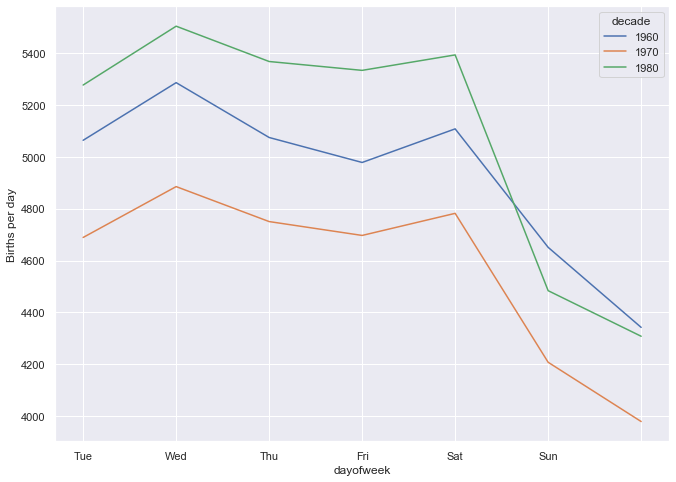